<a href="https://colab.research.google.com/github/alyaaahmed/Electro-Pi-Scholarship/blob/main/Compare_between_all_Regressors_and_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Dataset
# Cleaned Orange Telecom Customer Churn **Dataset** 

Context 

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

Content
The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded.

The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is, churn-20) for final testing and model performance evaluation.

Customer churn, also known as customer attrition, is when customers stop using a service or product offered by a company. In simplistic terms, it is when a customer leaves or ceases to be a client any longer. 

In [ ]:

# data analysis 
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA
# Metrics
from sklearn.metrics import f1_score, classification_report, make_scorer

import warnings
warnings.filterwarnings("ignore")

Workflow goals


Classifying and Correlating. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

Converting. For the modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

Completing. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

Correcting. We may also analyze the given training dataset for errors One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contributing to the analysis or may significantly skew the results.


Charting. How to select the right visualization plots and charts depending on the nature of the data and the solution goals.

In [ ]:
url_data =  "https://raw.githubusercontent.com/alyaaahmed/Electro-Pi-Scholarship/main/churn-bigml-80.csv"
url_test= "https://raw.githubusercontent.com/alyaaahmed/Electro-Pi-Scholarship/main/churn-bigml-20.csv"
df_train=pd.read_csv(url_data)
df_test= pd.read_csv(url_test)



Analyze by describing data¶


Data Info¶


In [ ]:
# Get the basic information about the train Dataset
df_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
# the distribution of numerical feature values across the samples
df_train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df_train['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64



1.   1- there is no missing value in data training 

2.  Area code  is int64 should be 

3. International plan  and  Voice mail plan are  object   shuld be bool   

4.   List item









In [ ]:
#distribution of categorical features
df_train.describe(include=['O'])

,State,International plan,Voice mail plan
count,2666,2666,2666
unique,51,2,2
top,WV,No,No
freq,88,2396,1933


In [ ]:
attFeatures = []
for i in df_train.columns:
    attFeatures.append([i, df_train[i].nunique(), df_train[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,State,51,"[KS, OH, NJ, OK, AL, MA, MO, WV, RI, IA, MT, I..."
1,Account length,205,"[128, 107, 137, 84, 75, 118, 121, 147, 141, 74..."
2,Area code,3,"[415, 408, 510]"
3,International plan,2,"[No, Yes]"
4,Voice mail plan,2,"[Yes, No]"
5,Number vmail messages,42,"[25, 26, 0, 24, 37, 27, 33, 39, 41, 28, 30, 34..."
6,Total day minutes,1489,"[265.1, 161.6, 243.4, 299.4, 166.7, 223.4, 218..."
7,Total day calls,115,"[110, 123, 114, 71, 113, 98, 88, 79, 84, 127, ..."
8,Total day charge,1489,"[45.07, 27.47, 41.38, 50.9, 28.34, 37.98, 37.0..."
9,Total eve minutes,1442,"[197.4, 195.5, 121.2, 61.9, 148.3, 220.6, 348...."


In [ ]:
def data_overview(df) :
    print("quick overview  for dataset")
    print("Dataset number of  samples:", df.shape[0])
    print("Number of features:", df.shape[1])
    print(" available features in the dataset",df.columns.values)
    print("Missing values:", df.isnull().sum().values.sum())
    print("number of non unique value \n" , df.nunique())
    

In [ ]:
data_overview(df_train)

quick overview  for dataset
Dataset number of  samples: 2666
Number of features: 20
 available features in the dataset ['State' 'Account length' 'Area code' 'International plan'
 'Voice mail plan' 'Number vmail messages' 'Total day minutes'
 'Total day calls' 'Total day charge' 'Total eve minutes'
 'Total eve calls' 'Total eve charge' 'Total night minutes'
 'Total night calls' 'Total night charge' 'Total intl minutes'
 'Total intl calls' 'Total intl charge' 'Customer service calls' 'Churn']
Missing values: 0
number of non unique value 
 State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge     

In [ ]:
# cheak correlation 
corrlation= df_train.corr()


**Correlation Matrix¶ **
 1- Total Day charge amount (total day charge) and Total Day call minutes (tolal day minutes) have strong correlation =1
 2- Total Night charge amount  and  Total Evening call minutes (toal event minutes) have strong correlation =1
 3 - Total International charge amount and Total International call minutes have strong correlation =1
so i can delete one of them. 

churn column have  weak postive corlation  with  number vmail message a,customer serice calls and totlal day calls


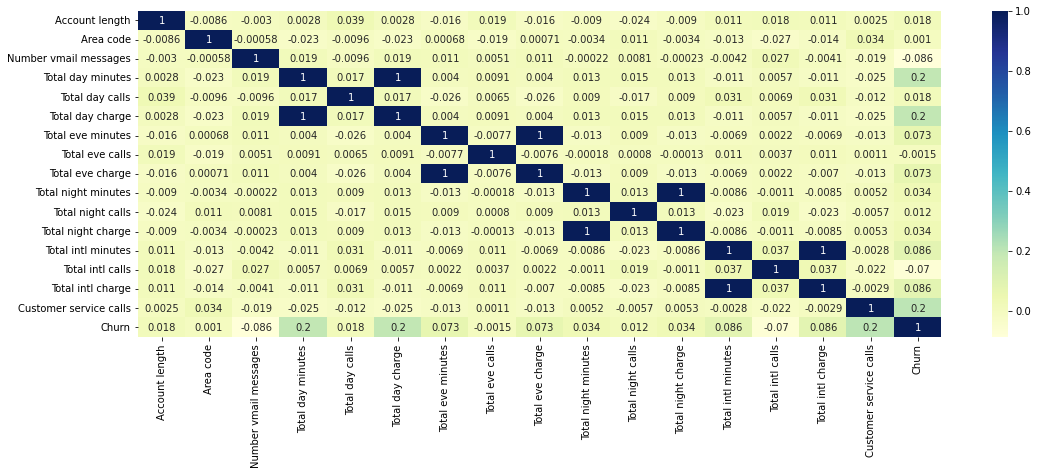

In [ ]:
plt.figure(figsize = (18,6))
sns.heatmap(corrlation,cmap="YlGnBu", annot = True)


In [ ]:
# calculate percentage of customer  churning from the company 
df_train['Churn'].value_counts(normalize=True).mul(100).astype(str)+'%'

False      85.4463615903976%
True     14.553638409602401%
Name: Churn, dtype: object

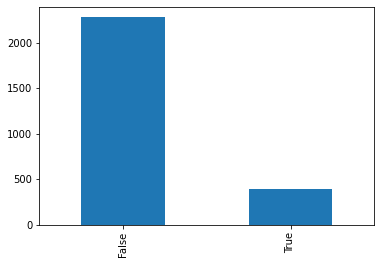

In [ ]:
df_train['Churn'].value_counts().plot(kind='bar');


Analyze by pivoting features¶


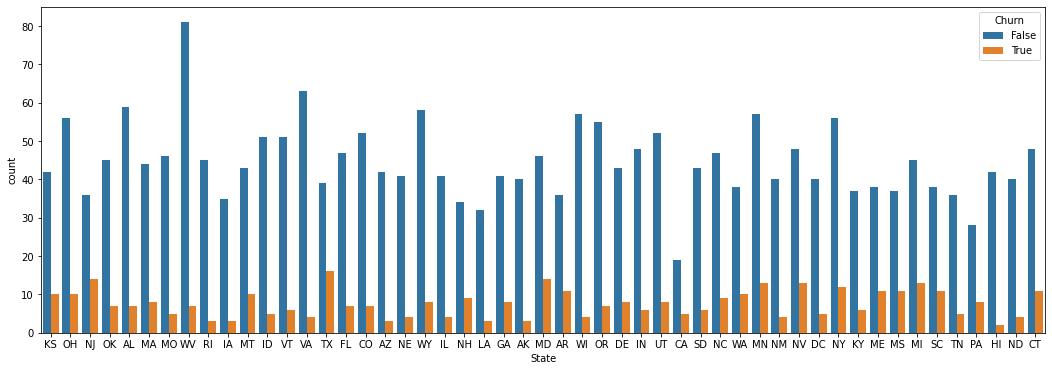

In [ ]:

#which state have most number of churn

plt.figure(figsize=(18,6))

sns.countplot(x = 'State', data = df_train, hue = 'Churn')


In [ ]:
def polt_relation(col_name_x,col_name_y,df):
  plt.figure(figsize = (16, 6))
  plt.subplot(1, 2, 1)
  sns.barplot(x=col_name_x , y= col_name_y,data=df)
  plt.subplot(1, 2, 2)
  sns.boxplot(x=col_name_x , y= col_name_y,data=df)

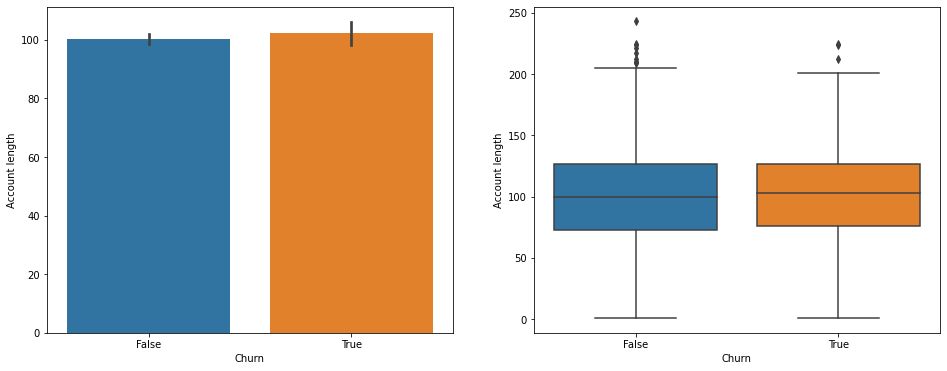

In [ ]:
polt_relation( 'Churn','Account length',df_train)

1- when try to plot chrunt in y-axis i get error why , is not chunt is the dependent var here?????


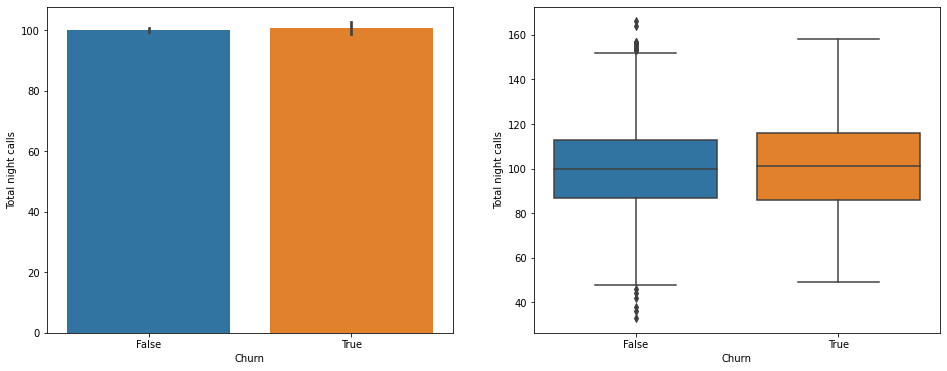

In [ ]:
polt_relation( 'Churn','Total night calls',df_train)

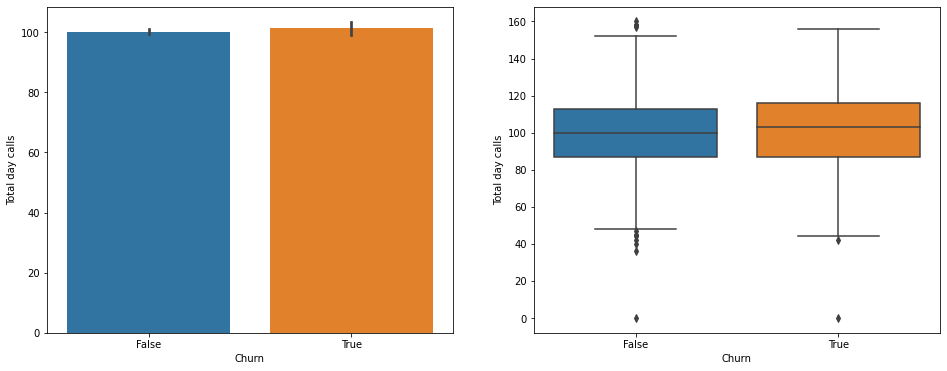

In [ ]:
polt_relation( 'Churn','Total day calls',df_train)

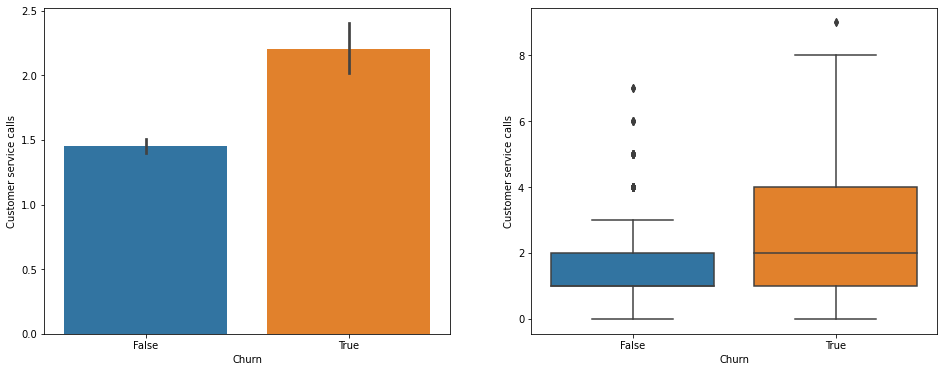

In [ ]:
polt_relation( 'Churn','Customer service calls',df_train)

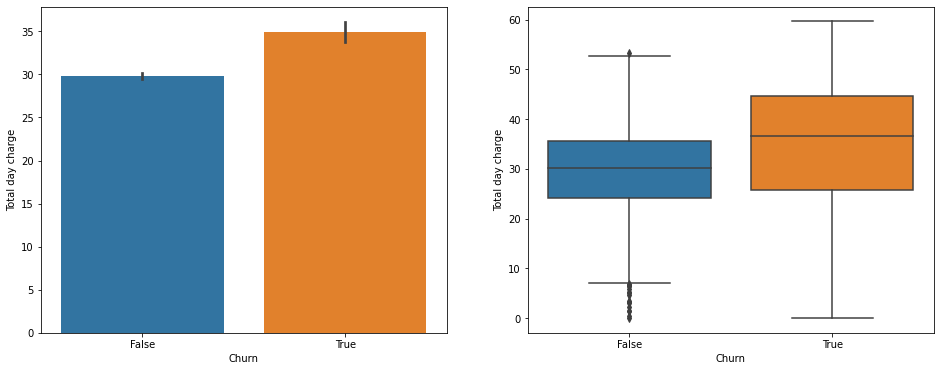

In [ ]:
polt_relation( 'Churn','Total day charge',df_train)

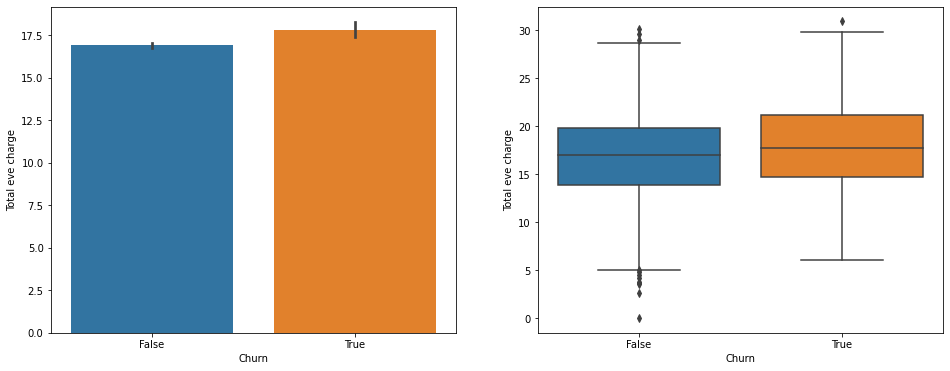

In [ ]:
polt_relation( 'Churn','Total eve charge',df_train)

In [ ]:
df_train['Churn'] = df_train['Churn'].astype(int)


In [ ]:
df_train['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [ ]:


df_train[['International plan', 'Churn']].groupby(['International plan'], as_index=False).mean().sort_values(by= "Churn", ascending=False)


,International plan,Churn
1,Yes,0.437037
0,No,0.112688


question2 How to group by 2 column 

In [ ]:
df_train[['Voice mail plan','Churn']].groupby(['Voice mail plan'],as_index=False).mean().sort_values(by="Churn",ascending=False)

,Voice mail plan,Churn
0,No,0.167098
1,Yes,0.088677


insights from pervious analyis  :-


1. 14% of customers have churned.
2. states(TX,NJ,MD) have hightes number from customer churn
3. customer which have more total charge amount(day,event) have churned
 
4.   customer which call Customer service most have churned





#3. Data preprocessing¶


In [ ]:
df_data_train = df_train.copy()
df_data_test=df_test.copy()

In [ ]:
df_data_train.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,0


In [ ]:
#convert boolean  column with yes,no to 1,0;

df_data_train['International plan'].replace(['No','Yes'],[0,1],inplace=True)
df_data_test['International plan'].replace(['No','Yes'],[0,1],inplace=True)
df_data_train['International plan'].value_counts()

0    2396
1     270
Name: International plan, dtype: int64

In [ ]:
#convert boolean  column with yes,no to 1,0;
df_data_train['Voice mail plan'].replace(['No','Yes'],[0,1],inplace=True)
df_data_test['Voice mail plan'].replace(['No','Yes'],[0,1],inplace=True)
df_data_train['Voice mail plan'].value_counts()

0    1933
1     733
Name: Voice mail plan, dtype: int64

In [ ]:
print(df_data_train['Voice mail plan'].isnull().sum())
print(df_data_train['International plan'].isnull().sum())

0
0


In [ ]:
df_data_train.head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
#
df_data_train['Total charge amount'] = df_data_train['Total day charge'] + df_data_train['Total eve charge'] + df_data_train['Total night charge']+ df_data_train['Total intl charge']
df_data_train['Total call minutes'] = df_data_train['Total day minutes'] + df_data_train['Total eve minutes'] + df_data_train['Total night minutes'] + df_data_train['Total intl minutes']
df_data_train['Total number of calls'] = df_data_train['Total day calls'] + df_data_train['Total eve calls'] + df_data_train['Total night calls'] + df_data_train['Total intl calls'] 

In [ ]:
df_data_train.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge amount,Total call minutes,Total number of calls
1866,CT,135,415,1,0,0,186.0,107,31.62,66.0,...,105,9.59,12.9,4,3.48,1,0,50.30,478.0,310
2650,MO,89,415,0,0,0,178.7,81,30.38,233.7,...,120,5.94,9.1,4,2.46,1,0,58.64,553.4,279
831,MN,139,510,0,1,25,96.2,112,16.35,178.9,...,84,8.19,12.9,10,3.48,2,0,43.23,470.1,276
112,NY,75,415,0,1,21,175.8,97,29.89,217.5,...,134,10.69,5.3,4,1.43,5,0,60.50,636.1,341
761,MA,97,408,0,0,0,217.6,81,36.99,320.5,...,110,6.78,4.2,3,1.13,0,0,72.14,693.0,245
1140,CO,192,415,0,0,0,221.6,101,37.67,285.2,...,83,7.53,12.7,6,3.43,4,0,72.87,686.9,240
573,IN,48,510,0,0,0,300.4,94,51.07,133.2,...,94,8.88,7.2,5,1.94,2,0,73.21,638.2,296
618,SD,85,408,0,0,0,209.8,82,35.67,194.5,...,85,9.02,11.3,3,3.05,0,0,64.27,616.0,264
2253,HI,24,415,0,0,0,235.6,132,40.05,115.9,...,136,8.34,16.2,2,4.37,0,0,62.61,553.1,399
1790,NH,93,408,0,0,0,179.3,93,30.48,188.8,...,88,11.39,12.1,5,3.27,1,0,61.19,633.4,251


In [ ]:
df_data_test['Total charge amount'] = df_data_test['Total day charge'] + df_data_test['Total eve charge'] + df_data_test['Total night charge']+ df_data_test['Total intl charge']
df_data_test['Total call minutes'] = df_data_test['Total day minutes'] + df_data_test['Total eve minutes'] + df_data_test['Total night minutes'] + df_data_test['Total intl minutes']
df_data_test['Total number of calls'] = df_data_test['Total day calls'] +df_data_test['Total eve calls'] + df_data_test['Total night calls'] + df_data_test['Total intl calls'] 

In [ ]:
df_data_test.sample(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge amount,Total call minutes,Total number of calls
165,ND,167,408,1,0,0,219.1,100,37.25,242.9,...,101,7.60,10.1,4,2.73,2,False,68.23,641.0,295
371,TX,201,415,0,1,21,192.0,97,32.64,239.1,...,125,5.22,15.1,3,4.08,1,False,62.26,562.3,306
193,IA,63,510,0,0,0,153.5,81,26.10,287.3,...,85,10.36,6.5,5,1.76,2,False,62.64,677.5,286
664,VT,60,415,0,0,0,193.9,118,32.96,85.0,...,134,9.45,13.2,8,3.56,3,False,53.20,502.2,370
578,MN,155,408,1,0,0,250.8,146,42.64,152.5,...,104,6.66,10.0,5,2.70,2,False,64.96,561.4,360
368,WY,62,415,0,0,0,172.4,132,29.31,230.5,...,109,10.27,11.0,5,2.97,0,False,62.14,642.1,346
567,OH,165,510,0,0,0,209.4,67,35.60,273.8,...,88,6.76,12.8,1,3.46,0,False,69.09,646.2,245
656,AK,99,510,0,0,0,238.4,96,40.53,246.5,...,117,8.93,12.4,4,3.35,3,False,73.76,695.7,347
100,MO,92,415,0,0,0,154.0,122,26.18,329.8,...,117,12.96,5.6,2,1.51,3,True,68.68,777.4,329
611,ME,57,415,0,0,0,221.1,101,37.59,236.7,...,137,11.35,9.5,1,2.57,0,False,71.63,719.6,304


In [ ]:
df_data_test[['Total charge amount','Total call minutes','Total number of calls']].describe()

,Total charge amount,Total call minutes,Total number of calls
count,667.000000,667.000000,667.000000
mean,59.797886,594.227136,306.055472
std,10.584342,88.893973,34.565535
min,27.080000,301.500000,210.000000
25%,52.795000,534.250000,283.000000
50%,59.880000,592.100000,308.000000
75%,66.000000,650.400000,330.000000
max,92.290000,882.200000,408.000000


Feature Selection¶


In [ ]:
df_data_train.drop(['State', 'Area code','Total day calls', 'Total day minutes', 'Total day charge', 
                   'Total eve calls', 'Total eve minutes', 'Total eve charge' ,
                  'Total night calls', 'Total night minutes', 'Total night charge'],axis=1,inplace = True)
                 



In [ ]:
df_data_train.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn',
       'Total charge amount', 'Total call minutes', 'Total number of calls'],
      dtype='object')

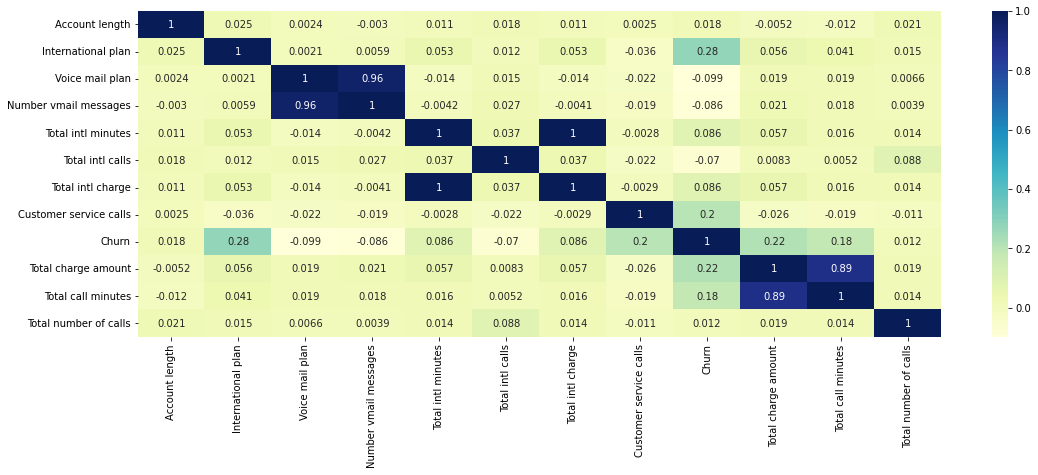

In [ ]:
#cheak correlation
plt.figure(figsize=(18,6))
sns.heatmap(df_data_train.corr(),cmap="YlGnBu", annot = True)

there is strong corr between total call minute and total charge amount =1  and voice mail paln and number of voice message =1
should drop one of them but i am not sure of the result od drop them so i keep them and let algorithem take decision 


In [ ]:
df_data_test.drop(['State', 'Area code','Total day calls', 'Total day minutes', 'Total day charge', 
                   'Total eve calls', 'Total eve minutes', 'Total eve charge' ,
                  'Total night calls', 'Total night minutes', 'Total night charge'],axis=1,inplace = True)

In [ ]:
df_data_test.columns

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn',
       'Total charge amount', 'Total call minutes', 'Total number of calls'],
      dtype='object')

In [ ]:
#

##Model, predict and solve

In [ ]:
X_train = df_data_train.drop("Churn", axis=1)
Y_train = df_data_train["Churn"]
X_test  = df_data_test.drop("Churn", axis=1)
Y_test = df_data_test["Churn"]
X_train.shape, Y_train.shape, X_test.shape


((2666, 11), (2666,), (667, 11))

print(

In [ ]:
print(X_test)

     Account length  International plan  Voice mail plan  \
0               117                   0                0   
1                65                   0                0   
2               161                   0                0   
3               111                   0                0   
4                49                   0                0   
..              ...                 ...              ...   
662             114                   0                1   
663             106                   0                1   
664              60                   0                0   
665             159                   0                0   
666             184                   1                0   

     Number vmail messages  Total intl minutes  Total intl calls  \
0                        0                 8.7                 4   
1                        0                12.7                 6   
2                        0                 5.4                 9   
3      

In [ ]:
# mix-max scale the data between 0 and 1
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train ,X_test

(array([[ 0.69216332, -0.33569005,  1.62391742, ...,  1.54557066,
          1.39596213, -0.05542219],
        [ 0.16127783, -0.33569005,  1.62391742, ..., -0.01170396,
          0.3760913 ,  0.7872349 ],
        [ 0.91968567, -0.33569005, -0.61579486, ...,  0.27933082,
         -0.57504911,  0.81629204],
        ...,
        [-0.82465237, -0.33569005, -0.61579486, ...,  0.39765316,
         -0.06511369, -1.91507923],
        [-1.83586283, -0.33569005, -0.61579486, ...,  0.79937658,
          0.93480315, -1.1886507 ],
        [-0.6729708 , -0.33569005,  1.62391742, ...,  1.68393146,
          1.81943024, -0.839965  ]]),
 array([[ 0.34712707, -0.29380132, -0.6288064 , ...,  1.27851712,
          1.87299223, -1.01493527],
        [-0.92773053, -0.29380132, -0.6288064 , ..., -0.52928064,
         -0.17029826,  0.89591412],
        [ 1.42585272, -0.29380132, -0.6288064 , ...,  3.07213238,
          2.50455474, -0.14636736],
        ...,
        [-1.05031299, -0.29380132, -0.6288064 , ..., -

#logistic Regression

LogisticRegression Train Score is :  86.42
LogisticRegression test Score is :  85.31
Accuracy Score is  =  0.8530734632683659
confusion matrix 
 [[551  21]
 [ 77  18]]


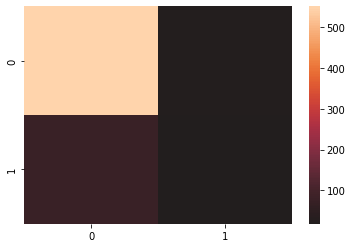

In [ ]:
#fitting logistic Regression to the Training set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train,Y_train)
Y_pred = LogisticRegression.predict(X_test)

#Calculating Details
acc_log_train_LGR = round(LogisticRegression.score(X_train, Y_train) * 100, 2)
acc_log_test_LGR= round(LogisticRegression.score(X_test, Y_test) * 100, 2)
print('LogisticRegression Train Score is : ',  acc_log_train_LGR)
print('LogisticRegression test Score is : ' , acc_log_test_LGR)
#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )

print('Accuracy Score is  = ', accuracy )

conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)

sns.heatmap(conf, center = True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C' : np.logspace(0.1,2,4,6),
    'penalty': ['l1','l2']
}


best_model_cv = GridSearchCV(estimator=LogisticRegression, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, Y_train)

sorted(best_model_cv.cv_results_.keys())
pd.DataFrame(best_model_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]

bestscorelg=best_model_cv.best_score_

print('score : ' , best_model_cv.best_score_)
print('params : ' ,best_model_cv.best_params_)
print('best : ' , best_model_cv.best_estimator_)


score :  0.861223282926417
params :  {'C': 1.2589254117941673, 'penalty': 'l2'}
best :  LogisticRegression(C=1.2589254117941673)


In [ ]:
#apply best model

SCV     # Support Vector Machines


svc Train Score is :  94.6
svc test Score is :  92.95
Accuracy Score is  =  0.9295352323838081
confusion matrix 
 [[568   4]
 [ 43  52]]


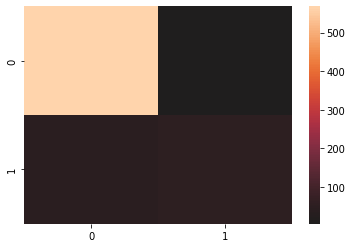

In [ ]:
from sklearn.svm import SVR
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

#Calculating Details
acc_train_svg = round(svc.score(X_train, Y_train) * 100, 2)
acc_test_svg = round(svc.score(X_test, Y_test) * 100, 2)
print('svc Train Score is : ',  acc_train_svg )
print('svc test Score is : ' , acc_test_svg )
#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )

print('Accuracy Score is  = ', accuracy )

conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)

sns.heatmap(conf, center = True)
plt.show()

grid search for svc


In [ ]:



param_grid = {
    'gamma': [0.001, 0.01, 0.1] 
}

best_model_cv = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, Y_train)

sorted(best_model_cv.cv_results_.keys())
pd.DataFrame(best_model_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]



print('score : ' , best_model_cv.best_score_)
print('params : ' ,best_model_cv.best_params_)
print('bestmodel : ' , best_model_cv.best_estimator_)


bestscoresvc = best_model_cv.best_score_

score :  0.925731463490186
params :  {'gamma': 0.1}
bestmodel :  SVC(gamma=0.1)


# KNN

KNN Train Score is :  94.86
KNN test Score is :  91.75
Accuracy Score is  =  0.9175412293853074
confusion matrix 
 [[566   6]
 [ 49  46]]


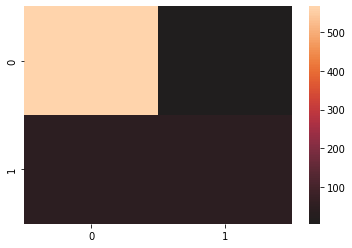

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

#Calculating Details
acc_knn_train = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn_test =round(knn.score(X_test, Y_test) * 100, 2)
print('KNN Train Score is : ',  acc_knn_train )
print('KNN test Score is : ' , acc_knn_test )
#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )

print('Accuracy Score is  = ', accuracy )

conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)

sns.heatmap(conf, center = True)
plt.show()

grid for KNN

In [ ]:
param_grid = {
    'n_neighbors': [4,2, 6,3,8] 
}

best_model_cv = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, Y_train)

sorted(best_model_cv.cv_results_.keys())
pd.DataFrame(best_model_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]



print('score : ' , best_model_cv.best_score_)
print('params : ' ,best_model_cv.best_params_)
print('bestmodel : ' , best_model_cv.best_estimator_)
bestscoreknn = best_model_cv.best_score_

score :  0.9084790628256032
params :  {'n_neighbors': 3}
bestmodel :  KNeighborsClassifier(n_neighbors=3)


# Gaussian Naive Bayes


gaussian Train Score is :  86.61
gaussian test Score is :  85.46
Accuracy Score is  =  0.8545727136431784
confusion matrix 
 [[524  48]
 [ 49  46]]


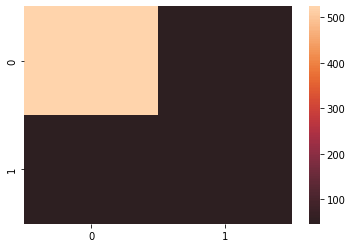

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian_train = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian_test =round(gaussian.score(X_test, Y_test) * 100, 2)
#Calculating Details
acc_gaussian_train= round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, Y_test) * 100, 2)
print('gaussian Train Score is : ',  acc_gaussian_train )
print('gaussian test Score is : ' , acc_gaussian_test )
#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )

print('Accuracy Score is  = ', accuracy )

conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)

sns.heatmap(conf, center = True)
plt.show()



# Decision Tree

decision_tree Train Score is :  100.0
decision_tree test Score is :  94.45
Accuracy Score is  =  0.9445277361319341
confusion matrix 
 [[549  23]
 [ 14  81]]


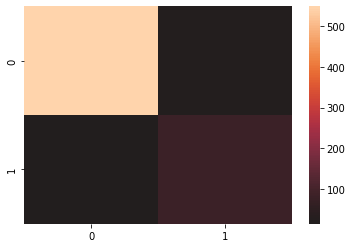

In [ ]:


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

#Calculating Details
acc_decision_tree_train = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree_test= round(decision_tree.score(X_test, Y_test) * 100, 2)
print('decision_tree Train Score is : ',  acc_decision_tree_train)
print('decision_tree test Score is : ' , acc_decision_tree_test)
#Calculating Prediction
accuracy= accuracy_score(Y_test , Y_pred )

print('Accuracy Score is  = ', accuracy )

conf = confusion_matrix(Y_test , Y_pred )
print('confusion matrix \n',  conf)

sns.heatmap(conf, center = True)
plt.show()

In [ ]:
param_grid = {
    'max_depth': [4,2, 6,3,8] 
}

best_model_cv = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv= 10)
best_model_cv.fit(X_train, Y_train)

sorted(best_model_cv.cv_results_.keys())
pd.DataFrame(best_model_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params' , 'rank_test_score' , 'mean_fit_time']]



print('score : ' , best_model_cv.best_score_)
print('params : ' ,best_model_cv.best_params_)
print('bestmodel : ' , best_model_cv.best_estimator_)
bestscoreDT=best_model_cv.best_score_

score :  0.974498042859959
params :  {'max_depth': 6}
bestmodel :  DecisionTreeClassifier(max_depth=6)


Model evaluation¶


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'DecisionTree', 'Naive Bayes'],
    'Score': [bestscoresvc, bestscoreknn, bestscorelg  , bestscoreDT,  accuracy]})
               
       
models.sort_values(by='Score', ascending=False)

,Model,Score
3,DecisionTree,0.974498
4,Naive Bayes,0.946027
0,Support Vector Machines,0.925731
1,KNN,0.908479
2,Logistic Regression,0.861223


link for IBM HR Analytics Employee Attrition & Performanced1.

https://colab.research.google.com/drive/19b452gj9D3ZgQ-5312g_mYI_PVxodj1t#scrollTo=Adyo1HnvFnKD